In [1]:
#linear regression ---> the prediction of the continous data 
#we use it we want to predict the continuous data 
"""REgression-- today earn 30k profit
tommorow- earn 20k profit 
this is to find the predicted values based on the previous data.  that what could be the profit amount tommorrow"""

'REgression-- today earn 30k profit\ntommorow- earn 20k profit \nthis is to find the predicted values based on the previous data.  that what could be the profit amount tommorrow'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
insurance =pd.read_csv("new_insurance_data.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
#first have to perform the EDA --> exploaratory data Analysis
# EDA--  data should be in proper form    empty values or nullvalues and some dont have proper value 
#so we have to clean the data and then analyse and visualise 
#so that we can confirm which are the independent variable we can use  or we can take the all columns as independent variable

In [6]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [8]:
#if some one call how many null values as a total then use below code
insurance.isnull().sum().sum()

52

In [9]:
#since there are null values then we have to deal with it   or else we can clean that 
insurance.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [10]:
#Removal of the Outliers
#integer/Flaot ---> Replace the null values with the mean/median      this would eb doen for the missing values
# Object---> replace it with the Mode

In [11]:
insurance["age"]=insurance["age"].fillna(insurance["age"].mean())

In [12]:
insurance["age"].isnull().sum()

0

In [13]:
insurance.isnull().sum()

age                                 0
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [14]:
col_names=insurance.columns
col_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [15]:
for col in col_names:
    if insurance[col].dtype=="object":
        insurance[col]=insurance[col].fillna(insurance[col].mode())
    else:
        insurance[col]=insurance[col].fillna(insurance[col].mean())
        

In [16]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [ ]:
#Visualising the data 
#finding the Outliers 
#whenever we are finding the data outliers we can do boxplot.

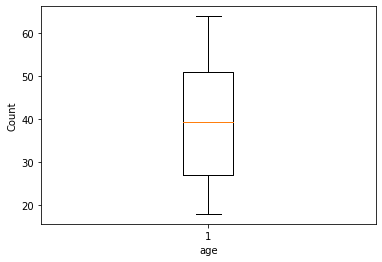

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

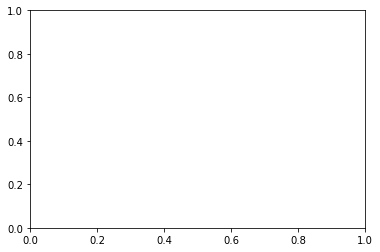

In [17]:
for col in col_names:
    plt.boxplot(insurance[col])
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

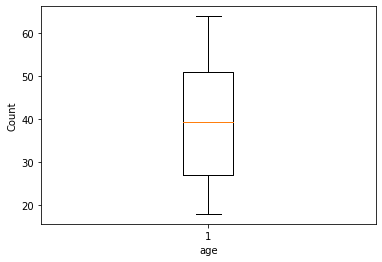

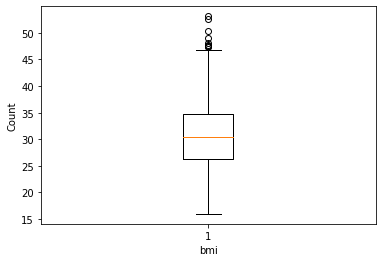

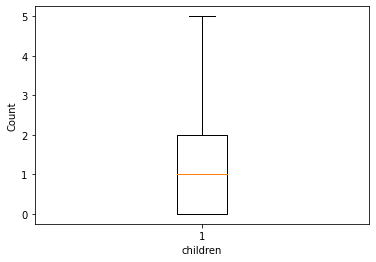

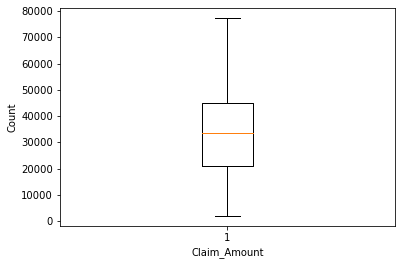

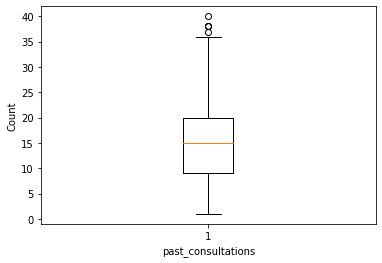

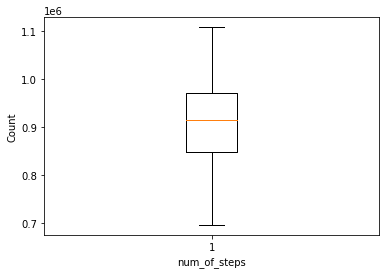

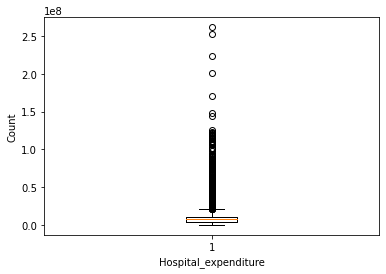

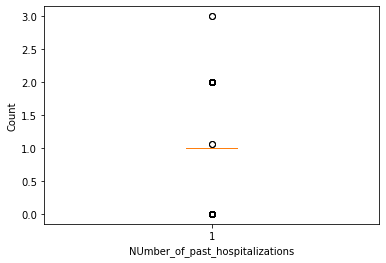

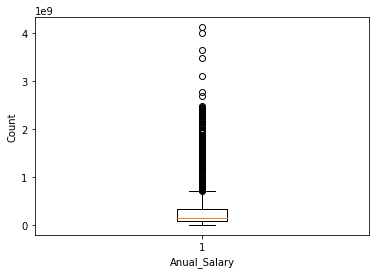

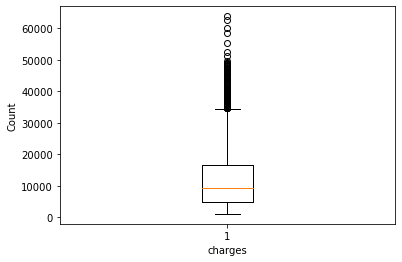

In [19]:
#since there arae columns of object so we cant able to plot the object type
for col in col_names:
    if insurance[col].dtype=="float64" or insurance[col].dtype=="int64":
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

In [ ]:
#outliers make the data biased     since we got the unexpected outputs

In [ ]:
# so we are going to remove the Outliers
#there is a thing we call it IQR--- inter Quartile Range

In [20]:
Q1=insurance["bmi"].quantile(0.25)
Q3=insurance["bmi"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [21]:
insurance=insurance[(insurance["bmi"]>=lower_limit)& (insurance["bmi"]<=upper_limit)]

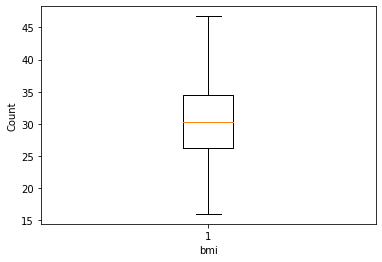

In [22]:
plt.boxplot(insurance["bmi"])
plt.xlabel("bmi")
plt.ylabel("Count")
plt.show()

In [23]:
Q1

26.315

In [24]:
Q3

34.65625

In [25]:
Q1=insurance["bmi"].quantile(0.25)
Q3=insurance["bmi"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [26]:
Q1

26.22

In [27]:
Q3

34.485

In [28]:
Q1=insurance["bmi"].quantile(0.25)
Q3=insurance["bmi"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [29]:
Q1,Q3

(26.22, 34.485)

In [30]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,60.0,male,32.800,0.0,yes,77277.98848,40.0,1095960.0,1.480346e+08,2.0,2.780642e+09,southwest,52590.82939
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897


In [31]:
insurance["bmi"]=insurance[(insurance["bmi"]>=lower_limit)& (insurance["bmi"]<=upper_limit)]

ValueError: Columns must be same length as key

In [33]:
(insurance[(insurance["bmi"]>=lower_limit)& (insurance["bmi"]<=upper_limit)]).shape

(1329, 13)

In [34]:
insurance["bmi"].shape

(1329,)

In [35]:
insurance.shape

(1329, 13)

In [ ]:
######################################3

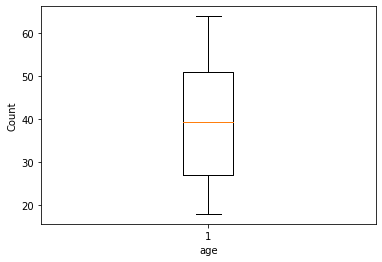

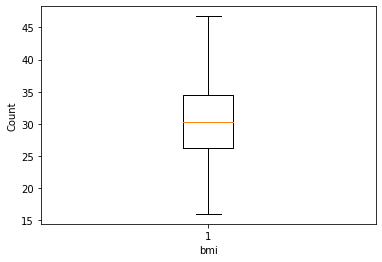

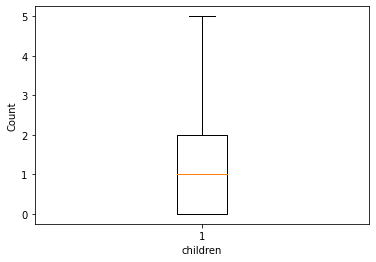

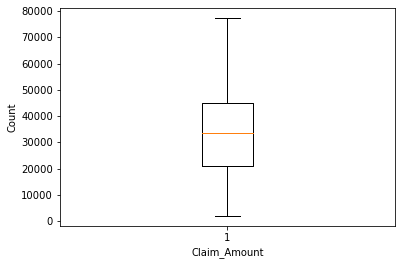

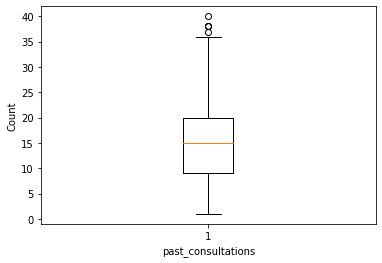

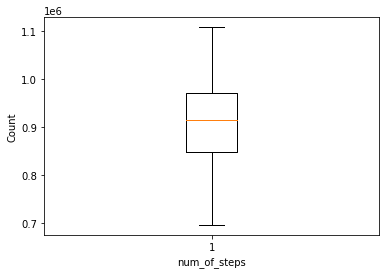

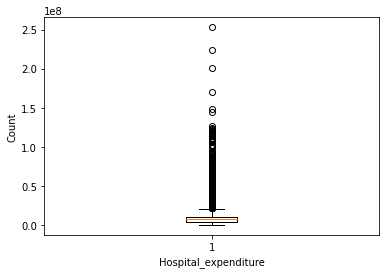

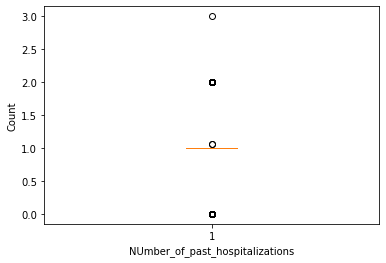

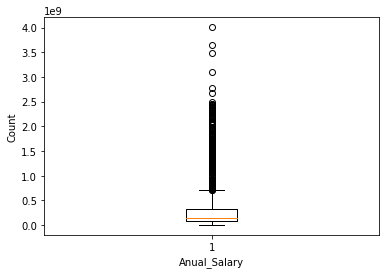

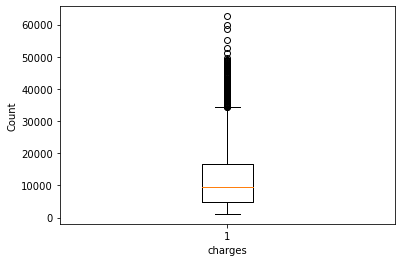

In [36]:
for col in col_names:
    if insurance[col].dtype=="float64" or insurance[col].dtype=="int64":
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

In [ ]:
#feature Selection and scaling 
"""Correlation coefficient 
VIF---VArience inflation factor"""

In [37]:
insurance.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.117855,0.042011,0.122780,0.170027,0.514218,0.138140,0.359628,0.165824,0.296565
bmi,0.117855,1.000000,0.012298,0.093232,0.124564,0.137963,0.244912,0.138292,0.232221,0.193563
children,0.042011,0.012298,1.000000,0.041140,0.056376,0.163651,0.030694,0.187780,0.043503,0.072453
Claim_Amount,0.122780,0.093232,0.041140,1.000000,0.269913,0.394838,0.368244,0.374809,0.400747,0.431927
past_consultations,0.170027,0.124564,0.056376,0.269913,1.000000,0.558788,0.543607,0.497321,0.589155,0.624894
num_of_steps,0.514218,0.137963,0.163651,0.394838,0.558788,1.000000,0.630342,0.843639,0.737522,0.891046
Hospital_expenditure,0.138140,0.244912,0.030694,0.368244,0.543607,0.630342,1.000000,0.649913,0.959649,0.875735
NUmber_of_past_hospitalizations,0.359628,0.138292,0.187780,0.374809,0.497321,0.843639,0.649913,1.000000,0.733409,0.818275
Anual_Salary,0.165824,0.232221,0.043503,0.400747,0.589155,0.737522,0.959649,0.733409,1.000000,0.948853
charges,0.296565,0.193563,0.072453,0.431927,0.624894,0.891046,0.875735,0.818275,0.948853,1.000000


In [ ]:
#VIF---Variation infalation factor
"""Multi Coliniarity--> example- chips packet Netfilx happiness
when 2 or more factors collectively influence the dependent variables"""

In [ ]:
"""higher the vif value higher the collinearity
if the value of vif is less than 6 we have to take them as independent terms"""

In [38]:
#vif           --- for object type we cant find the vif
#Multi coliniarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
col_list=[]
for col in col_names:
    if insurance[col].dtype!="object" and col!="charges":
        col_list.append(col)
        

In [40]:
col_list # we run the above code so that we get the independent column  thats why not included the col charges as it is dependent

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [41]:
X=insurance[col_list]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1332,60.0,32.800,0.0,77277.98848,40.0,1095960.0,1.480346e+08,2.0,2.780642e+09
1333,33.0,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09
1334,31.0,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09
1335,52.0,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09


In [42]:
vif_data=pd.DataFrame()     #empty dataframe

In [43]:
vif_data

""


In [44]:
print(vif_data)

Empty DataFrame
Columns: []
Index: []


In [45]:
vif_data["Columns names"]=X.columns

In [46]:
vif_data["Columns names"]

0                                age
1                                bmi
2                           children
3                       Claim_Amount
4                 past_consultations
5                       num_of_steps
6               Hospital_expenditure
7    NUmber_of_past_hospitalizations
8                       Anual_Salary
Name: Columns names, dtype: object

In [47]:
vif_data

,Columns names
0,age
1,bmi
2,children
3,Claim_Amount
4,past_consultations
5,num_of_steps
6,Hospital_expenditure
7,NUmber_of_past_hospitalizations
8,Anual_Salary


In [51]:
vif_data["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [52]:
vif_data["VIF values"]

0    11.950679
1    27.108171
2     1.948672
3     6.887483
4     8.316586
5    61.144988
6    19.072873
7    15.884628
8    25.291964
Name: VIF values, dtype: float64

In [53]:
vif_data

,Columns names,VIF values
0,age,11.950679
1,bmi,27.108171
2,children,1.948672
3,Claim_Amount,6.887483
4,past_consultations,8.316586
5,num_of_steps,61.144988
6,Hospital_expenditure,19.072873
7,NUmber_of_past_hospitalizations,15.884628
8,Anual_Salary,25.291964


In [54]:
variance_inflation_factor(X.values,1)      # this is simply for the 1 column vif    we can simply do like that but we  use whole in loop

27.108170813136397

In [55]:
# when we find VIF we have to remove the highest values

In [56]:
insurance=insurance.drop("num_of_steps",axis=1)

In [57]:
vif_data

,Columns names,VIF values
0,age,11.950679
1,bmi,27.108171
2,children,1.948672
3,Claim_Amount,6.887483
4,past_consultations,8.316586
5,num_of_steps,61.144988
6,Hospital_expenditure,19.072873
7,NUmber_of_past_hospitalizations,15.884628
8,Anual_Salary,25.291964


In [58]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,60.0,male,32.800,0.0,yes,77277.98848,40.0,1.480346e+08,2.0,2.780642e+09,southwest,52590.82939
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897


In [61]:
col_list=[]
for col in insurance.columns:
    if insurance[col].dtype!="object" and col!="charges":
        col_list.append(col)
X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["Column names"]=X.columns

vif_data["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Column names,VIF values
0,age,10.169023
1,bmi,11.968548
2,children,1.933161
3,Claim_Amount,6.368405
4,past_consultations,7.534765
5,Hospital_expenditure,18.962583
6,NUmber_of_past_hospitalizations,13.836393
7,Anual_Salary,25.269708


In [59]:
#train Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.3)

NameError: name 'x' is not defined

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
#Building a model( linear regression model)

from sklearn.linear_model import LinearRegression

In [ ]:
li_model=LinearRegression()

In [ ]:
li_model

In [ ]:
#Now we have to train  or  fitting or training data

li_model.fit(x_train,y_train)


In [ ]:
#Prediction 


pred_y=li_model.predict(x_test)

In [ ]:
pred_y

In [ ]:
y_test

In [ ]:
#Check  Accuracy of model

from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mape=mean_absolute_percentage_error(pred_y,y_test)

In [ ]:
print(mape)

In [ ]:
#jo aayega 100- mape  is the accuracy of the 